In [1]:
import tensorflow as tf

In [2]:
from keras.datasets import mnist
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [4]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

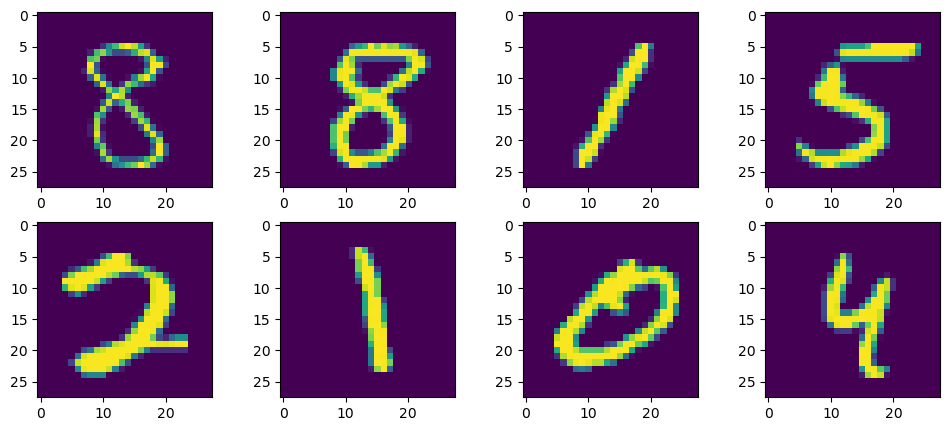

In [5]:
import matplotlib.pyplot as plt 
import random
plt.figure(figsize = (12,5))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240+1+i)
  plt.imshow(X_train[ind])

# 2. Preprocessing data
This task includes the following steps:

Reshape images into the required size of Keras
Convert integer values into float values
Normalize data
One-hot encoding labels

In [6]:
from keras.utils import to_categorical
def preprocess_data(X_train, y_train, X_test, y_test):
  # reshape images to the required size of Keras
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  
  # convert image values from integers to floats
  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  
  # normalization
  X_train = X_train/255.0
  X_test_norm = X_test/255.0
  
  # One-hot encoding label 
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  
  return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test=preprocess_data(X_train, y_train, X_test, y_test)

# Lenet Architecture

In [7]:
#creating the CNN
#First convolutional layer
model=Sequential()
model.add(Conv2D(6,kernel_size=(5,5),activation="relu",padding='valid',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2),strides=2))

In [8]:
#Second convolutional layer
model.add(Conv2D(16,kernel_size=(5,5),activation="relu",padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),strides=2))

In [9]:
#Flatten the layer after passing the data in 2  Convolution layer
model.add(Flatten())

In [10]:
#Simple making fully forword connected layers
model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',metrics=['accuracy'],loss="categorical_crossentropy")

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [12]:
#Early stopping
early_stop=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=2,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [13]:
model.fit(X_train,y_train,epochs=100,batch_size=128,callbacks=early_stop,validation_data=(X_test,y_test),verbose=1)

Epoch 1/100
469/469 [==============================] - 12s 24ms/step - loss: 0.2650 - accuracy: 0.9258 - val_loss: 0.0864 - val_accuracy: 0.9736
Epoch 2/100
469/469 [==============================] - 11s 24ms/step - loss: 0.0738 - accuracy: 0.9775 - val_loss: 0.0708 - val_accuracy: 0.9781
Epoch 3/100
469/469 [==============================] - 15s 32ms/step - loss: 0.0525 - accuracy: 0.9844 - val_loss: 0.0617 - val_accuracy: 0.9817
Epoch 4/100
469/469 [==============================] - 16s 33ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0534 - val_accuracy: 0.9838
Epoch 5/100
469/469 [==============================] - 13s 27ms/step - loss: 0.0340 - accuracy: 0.9896 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 6/100
469/469 [==============================] - 14s 31ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0506 - val_accuracy: 0.9853
Epoch 7/100
469/469 [==============================] - 13s 28ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0563 - val_ac

In [14]:
#prediction 
"""y_pred=[]
for i in range(len(X_test)):
    img=X_test[i]
    img=img.reshape(1,28,28,1)
    img=img.astype('float32')
    img=img/255.0
    vec_p = model.predict(img)
    # determine the label corresponding to vector vec_p
    y_p = np.argmax(vec_p)
    y_pred.append(y_p)
y_pred=np.asarray(y_pred)
y_pred"""

"y_pred=[]\nfor i in range(len(X_test)):\n    img=X_test[i]\n    img=img.reshape(1,28,28,1)\n    img=img.astype('float32')\n    img=img/255.0\n    vec_p = model.predict(img)\n    # determine the label corresponding to vector vec_p\n    y_p = np.argmax(vec_p)\n    y_pred.append(y_p)\ny_pred=np.asarray(y_pred)\ny_pred"

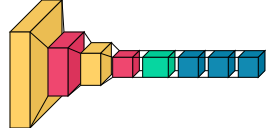

In [15]:
import visualkeras
visualkeras.layered_view(model)
